#### 1.IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle

#### 2.READ DATASET 

In [2]:
df = pd.read_csv(r"C:\Users\dudid\Downloads/New folder/retail_price.csv")

#### 3.SANITY CHECK OF DATA

In [3]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [4]:
print("shape of data set is : ")
df.shape

shape of data set is : 


(676, 30)

In [5]:
print("\nInformation about the dataset:")
df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  wee

In [6]:
#finding missing values
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [7]:
percentage_missing  = df.isnull().sum()/df.shape[0]*100
percentage_missing

product_id                    0.0
product_category_name         0.0
month_year                    0.0
qty                           0.0
total_price                   0.0
freight_price                 0.0
unit_price                    0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_score                 0.0
customers                     0.0
weekday                       0.0
weekend                       0.0
holiday                       0.0
month                         0.0
year                          0.0
s                             0.0
volume                        0.0
comp_1                        0.0
ps1                           0.0
fp1                           0.0
comp_2                        0.0
ps2                           0.0
fp2                           0.0
comp_3                        0.0
ps3                           0.0
fp3                           0.0
lag_price     

In [8]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
#identifying garbage values
for i in df.select_dtypes(include="object"):
    print(df[i].value_counts())
    print("****"*10)

product_id
health7       20
health5       20
bed2          19
health9       18
garden3       18
computers4    18
garden1       18
garden9       17
watches1      17
health8       17
garden2       17
bed1          16
garden6       16
garden10      16
garden7       16
watches2      15
cool1         15
watches3      15
computers1    15
garden5       14
watches6      14
garden4       14
garden8       14
furniture2    13
furniture1    13
health2       13
perfumery2    13
cool2         13
perfumery1    13
cool5         13
furniture3    12
watches7      12
consoles1     12
health4       11
bed3          11
consoles2     10
computers3    10
furniture4    10
watches5      10
watches4      10
bed4          10
computers2    10
watches8      10
health1        9
cool4          9
health3        8
computers6     8
computers5     8
health10       7
health6        7
cool3          7
bed5           5
Name: count, dtype: int64
****************************************
product_category_name
garden_tools    

In [10]:
df_processed = df.copy()

# Convert 'month_year' to datetime objects
df_processed['month_year'] = pd.to_datetime(df_processed['month_year'], format='%d-%m-%Y')
print("\n'month_year' converted to datetime.")

# Handle 'product_id' - Dropping as it's an identifier
df_processed = df_processed.drop('product_id', axis=1)
print("'product_id' column dropped.")

# Handle 'product_category_name' - One-hot encode
# Using drop_first=True to avoid multicollinearity
df_processed = pd.get_dummies(df_processed, columns=['product_category_name'], drop_first=True)
print("One-hot encoding applied to 'product_category_name'.")

# Define the target variable 'unit_price'
target_variable = 'unit_price'
print(f"Target variable defined as: {target_variable}")

print("\nProcessed Data Head:")
print(df_processed.head())
print("\nProcessed Data Info:")
print(df_processed.info())


'month_year' converted to datetime.
'product_id' column dropped.
One-hot encoding applied to 'product_category_name'.
Target variable defined as: unit_price

Processed Data Head:
  month_year  qty  total_price  freight_price  unit_price  \
0 2017-05-01    1        45.95      15.100000       45.95   
1 2017-06-01    3       137.85      12.933333       45.95   
2 2017-07-01    6       275.70      14.840000       45.95   
3 2017-08-01    4       183.80      14.287500       45.95   
4 2017-09-01    2        91.90      15.100000       45.95   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                   39                         161                   2   
1                   39                         161                   2   
2                   39                         161                   2   
3                   39                         161                   2   
4                   39                         161                   2   

   produ

#### 4.EXPLORATORY DATA ANALYSIS (EDA)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [12]:
df.describe(include="object")

,product_id,product_category_name,month_year
count,676,676,676
unique,52,9,20
top,health7,garden_tools,01-03-2018
freq,20,160,50


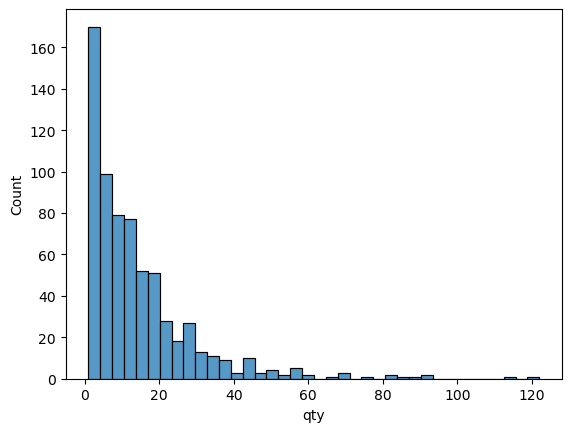

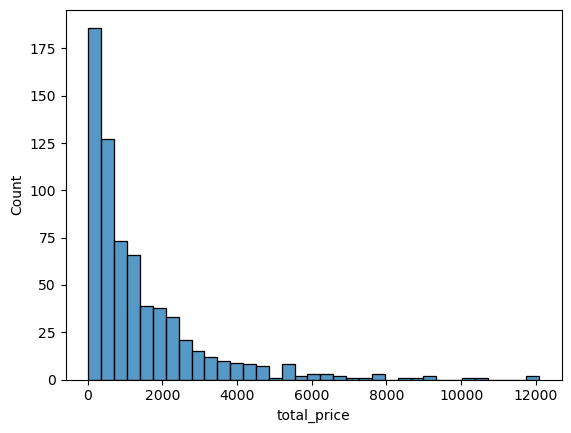

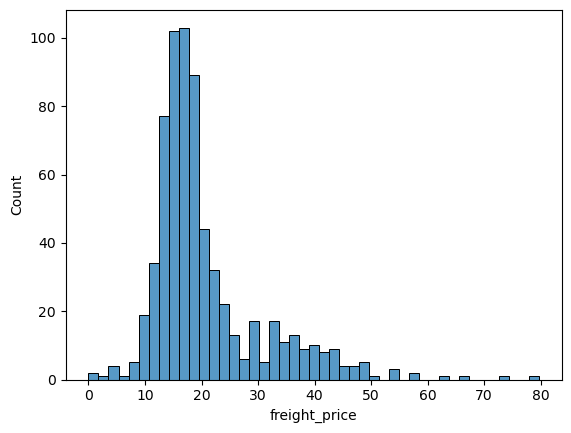

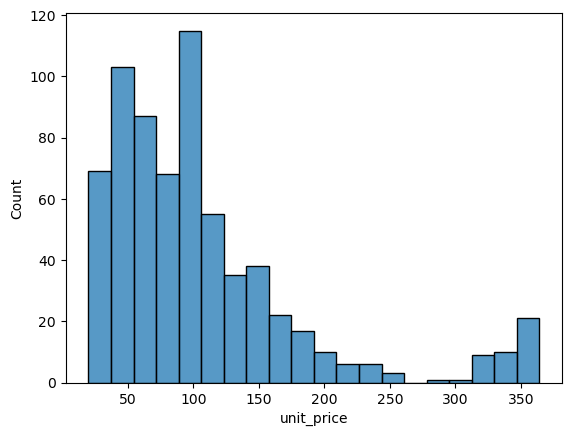

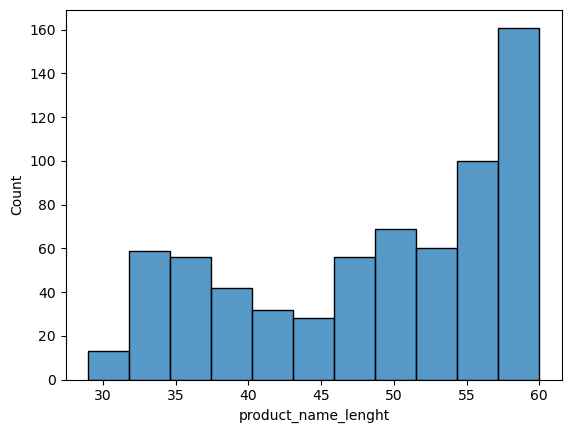

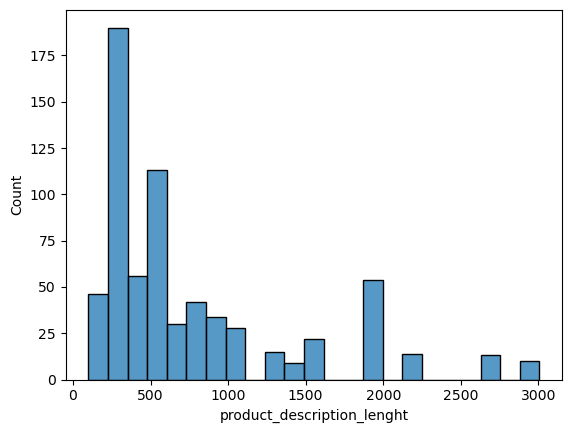

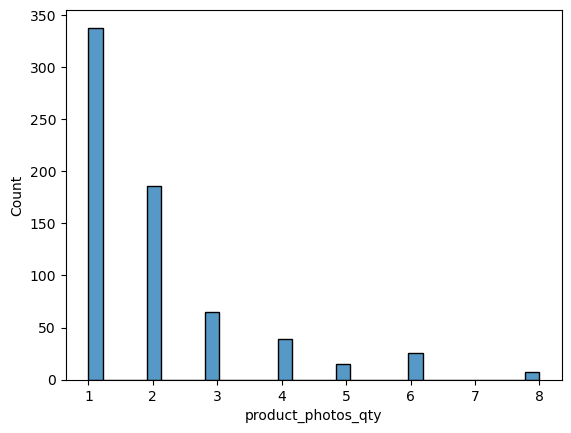

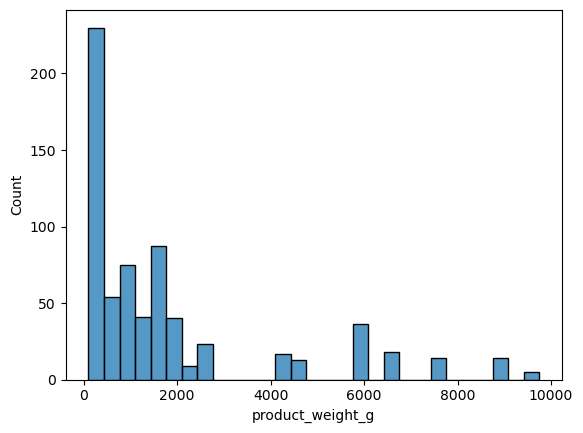

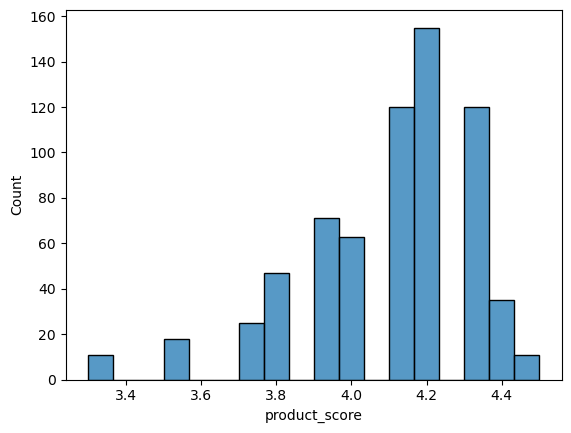

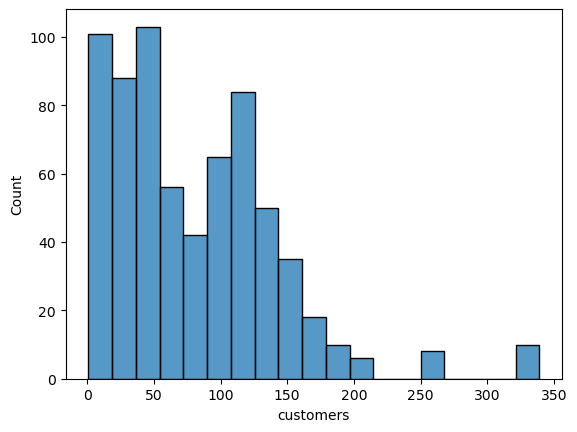

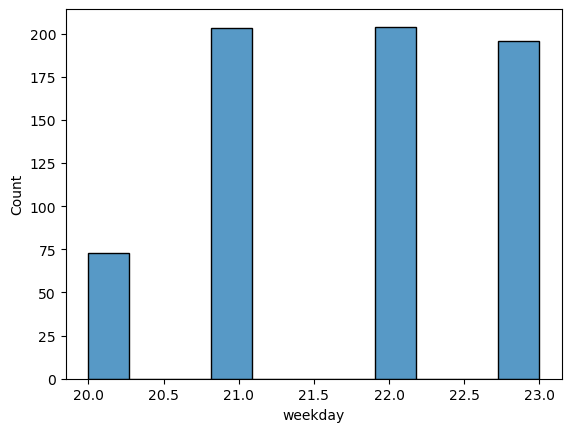

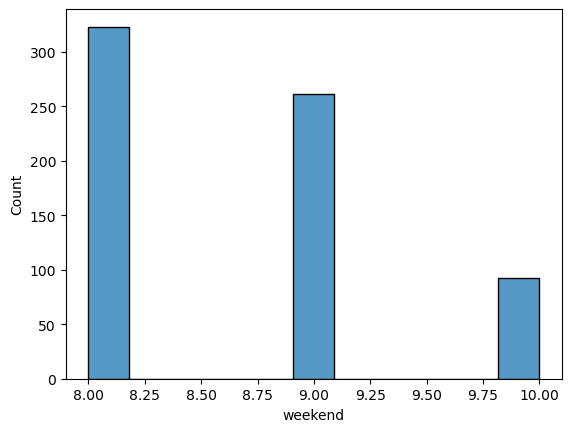

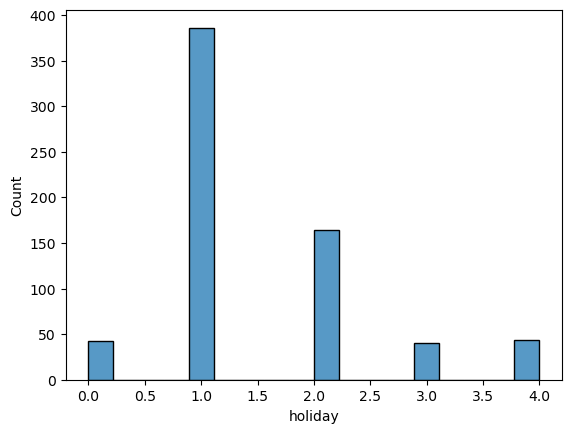

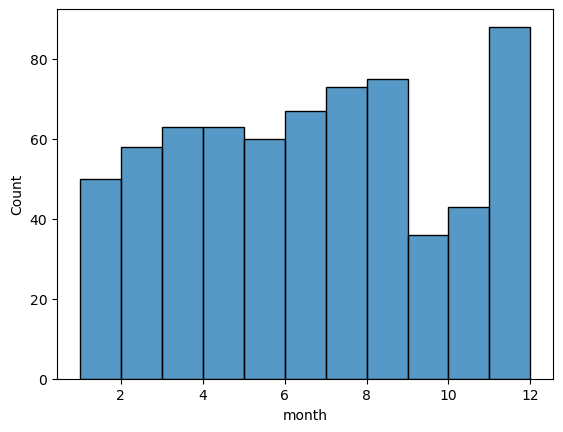

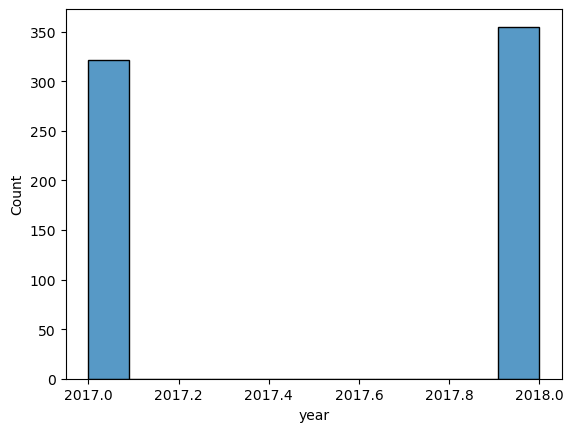

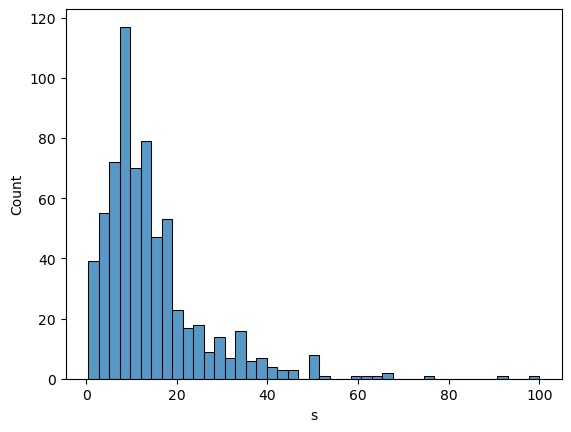

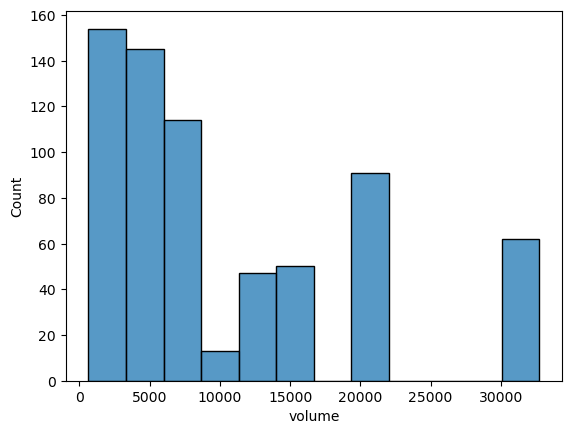

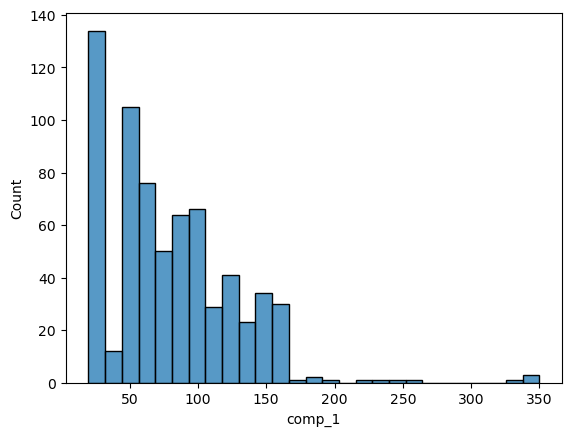

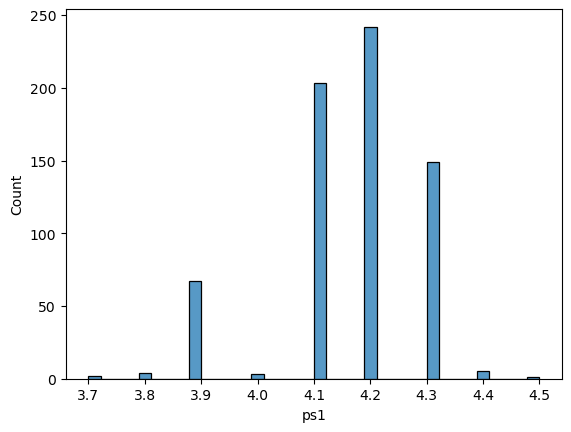

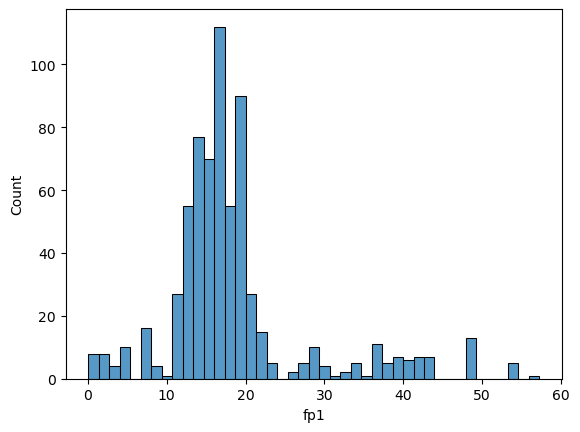

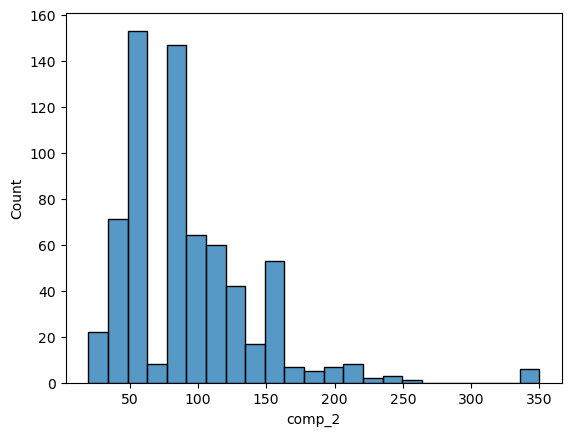

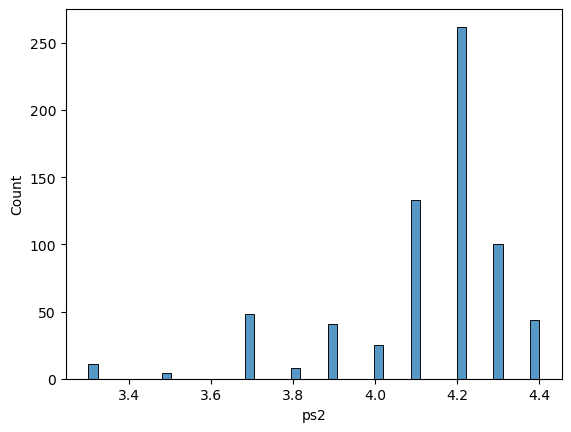

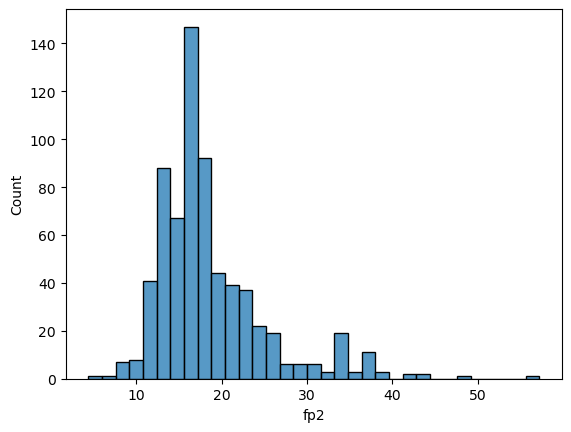

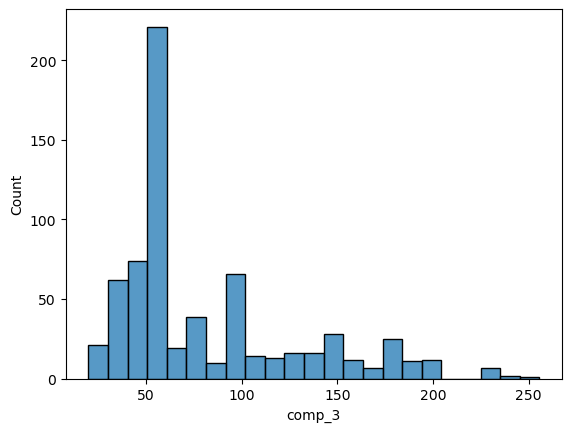

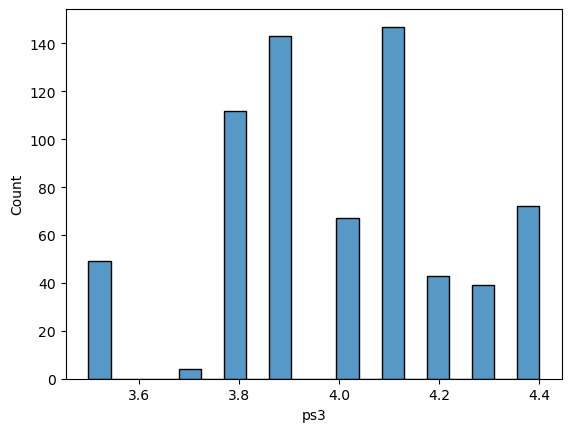

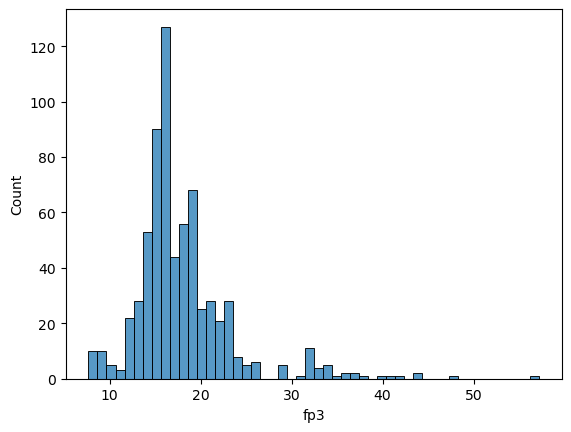

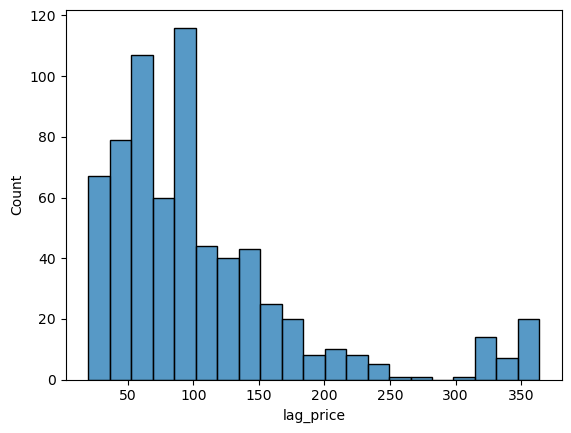

In [13]:
#Histogram
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

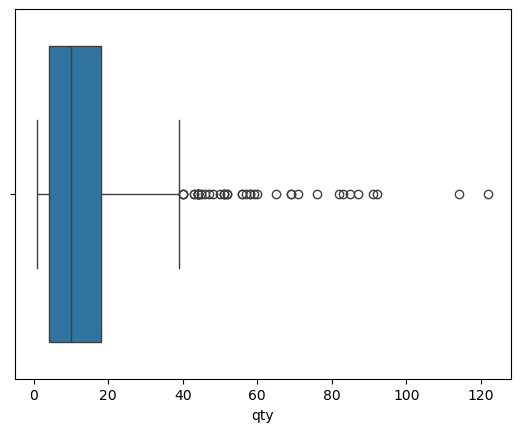

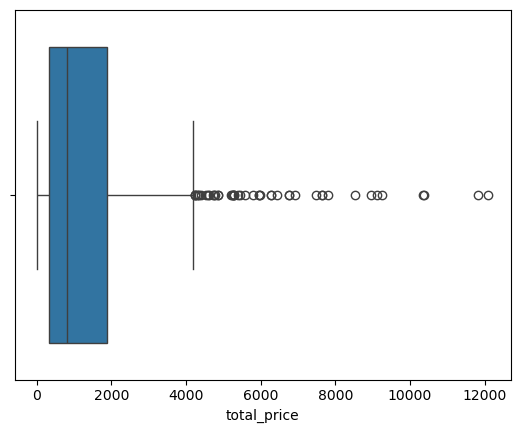

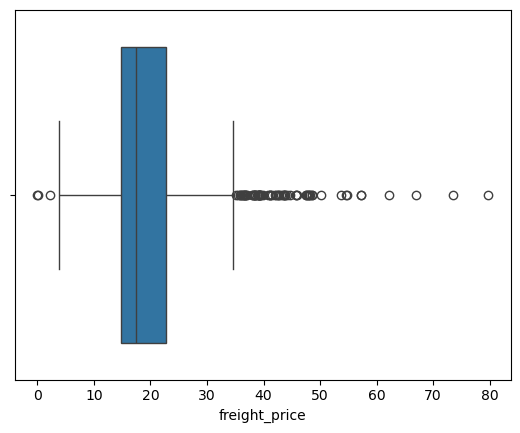

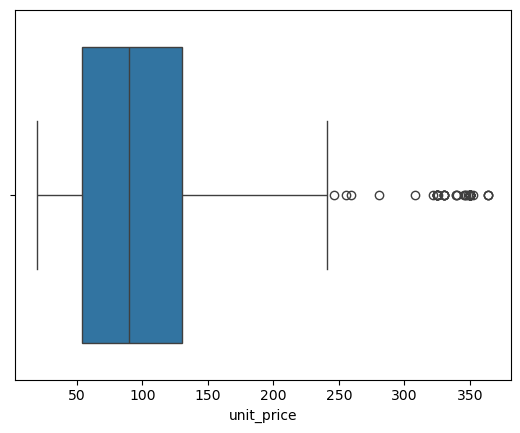

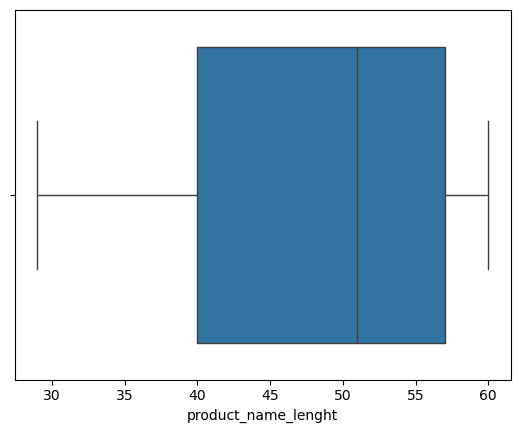

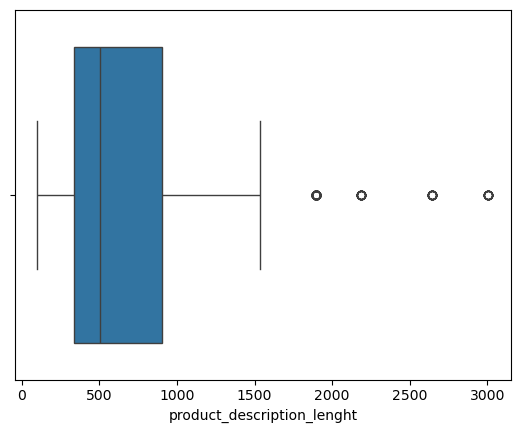

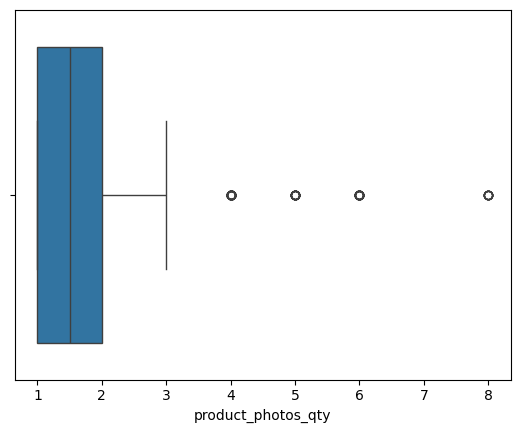

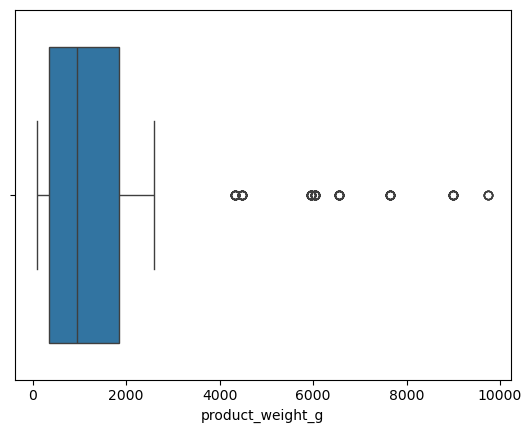

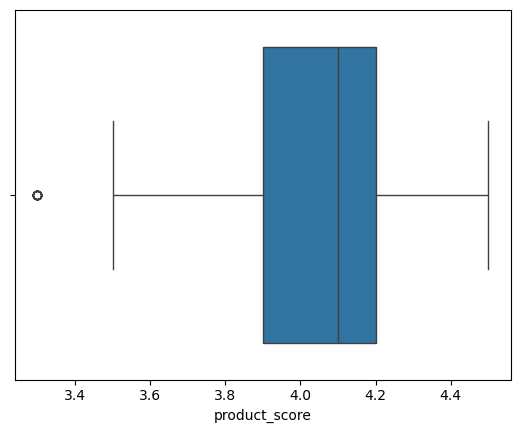

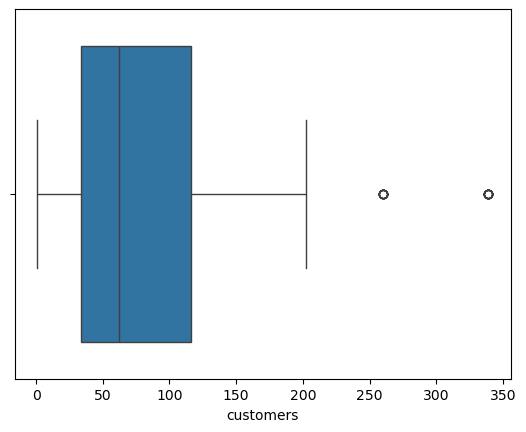

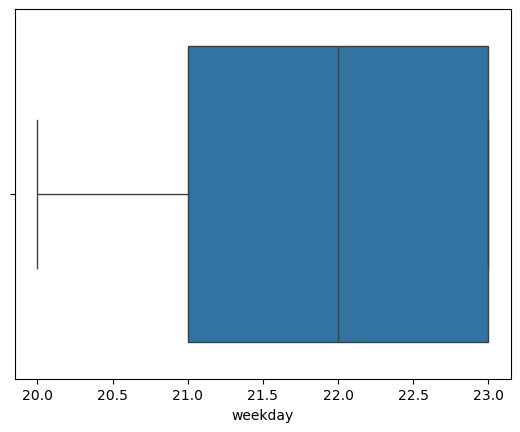

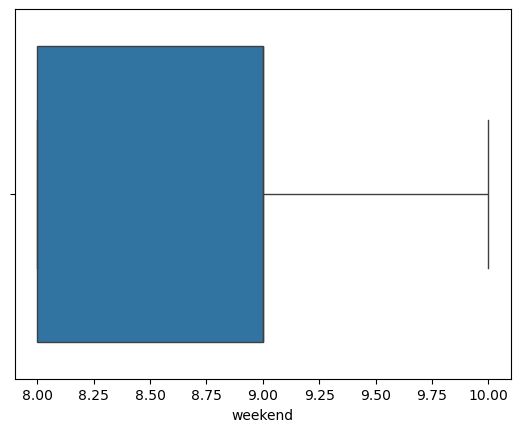

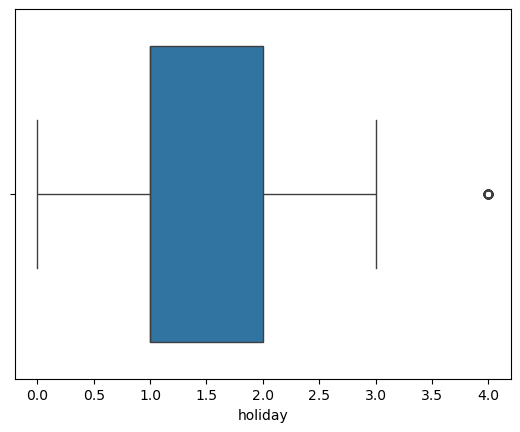

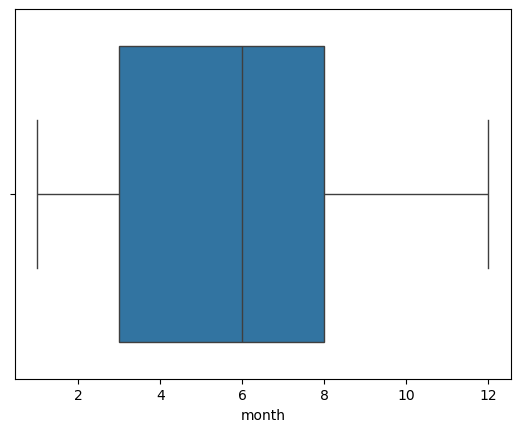

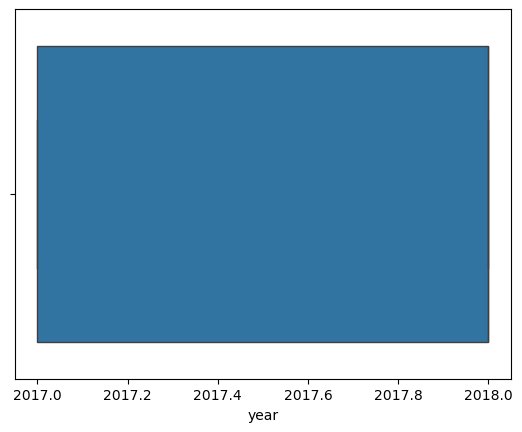

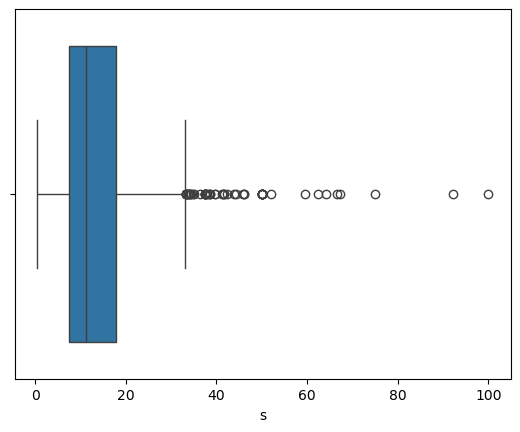

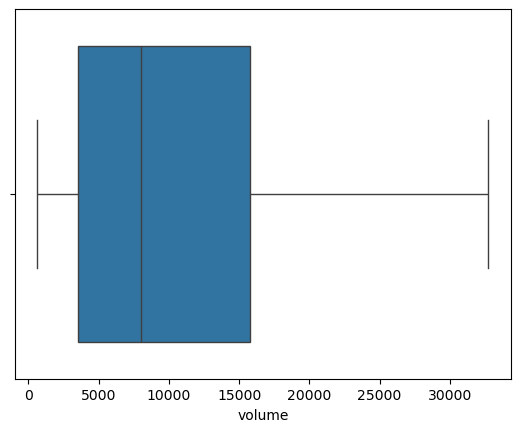

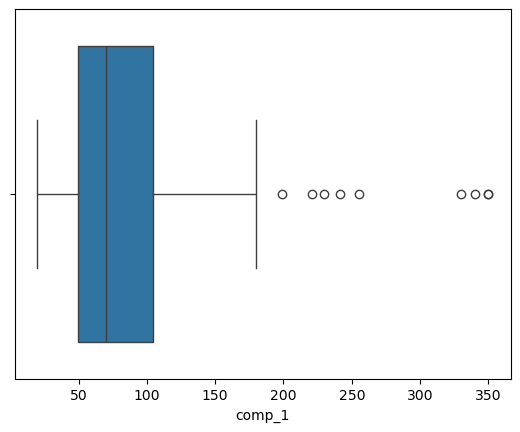

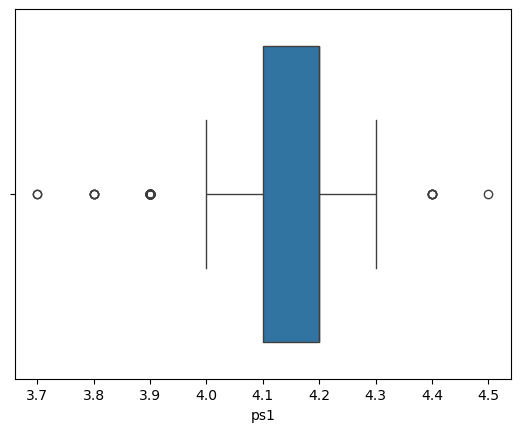

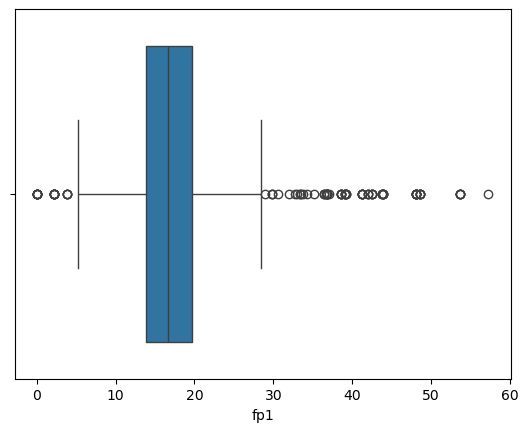

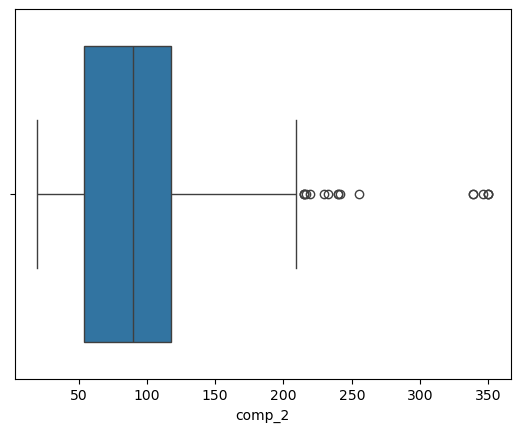

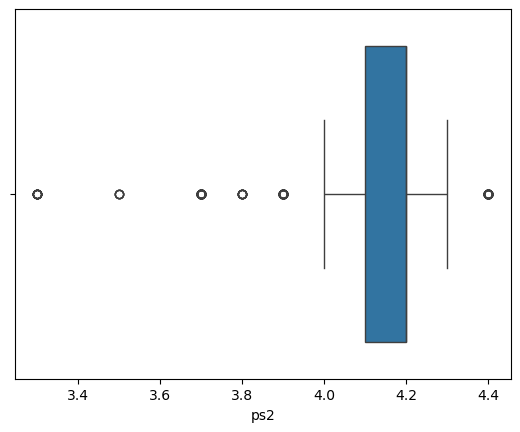

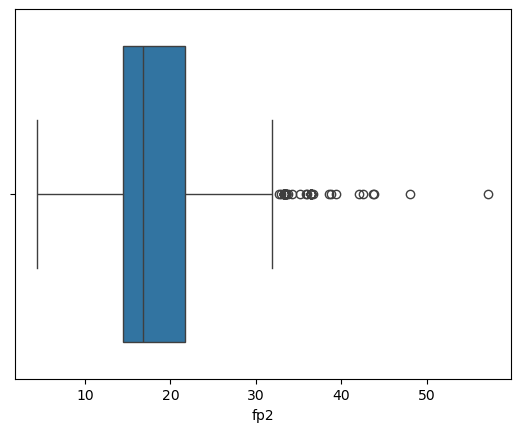

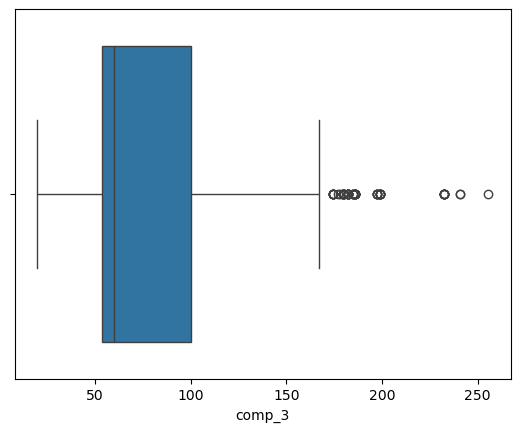

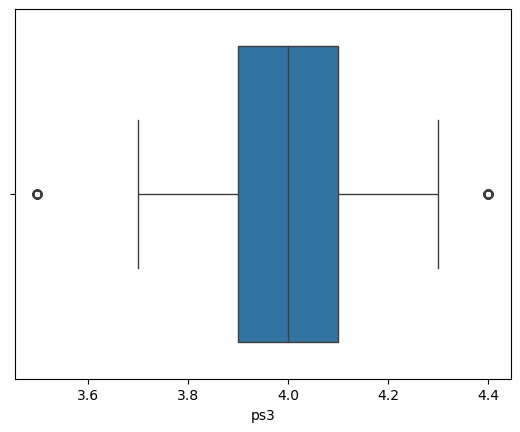

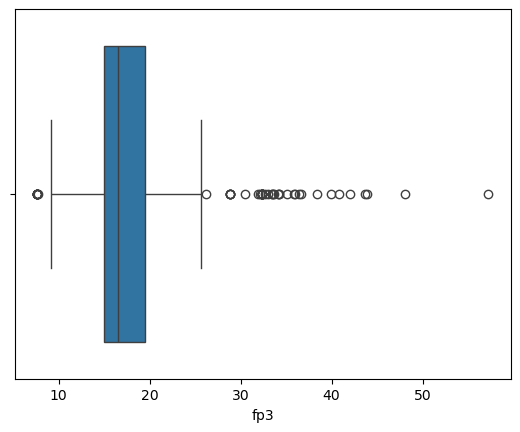

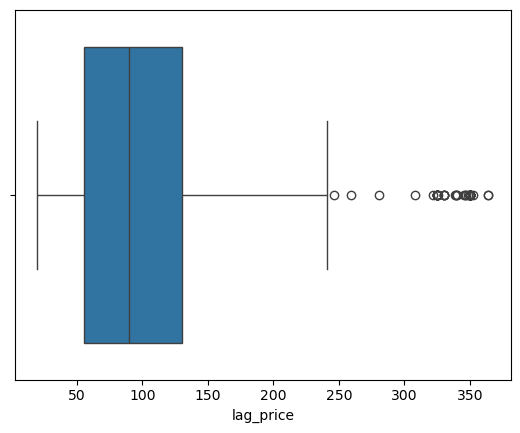

In [14]:
#Boxplot
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

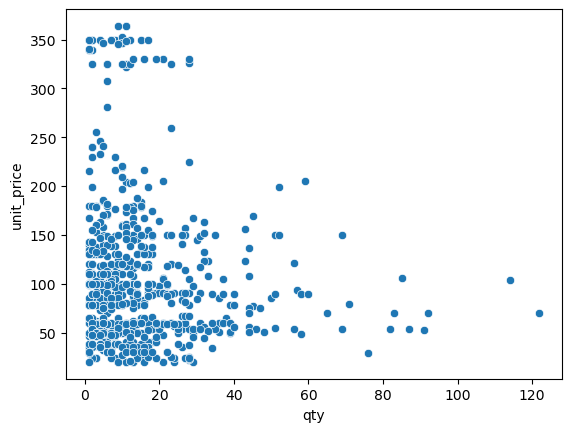

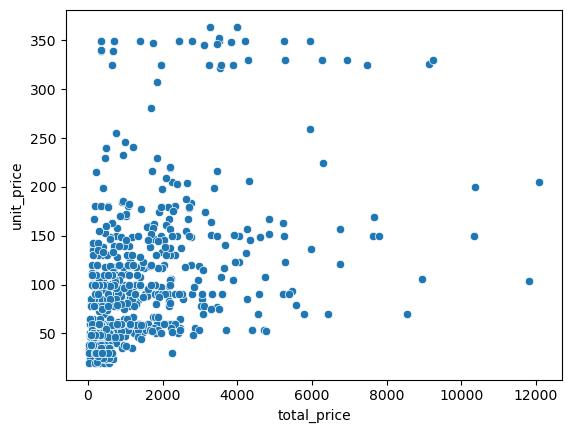

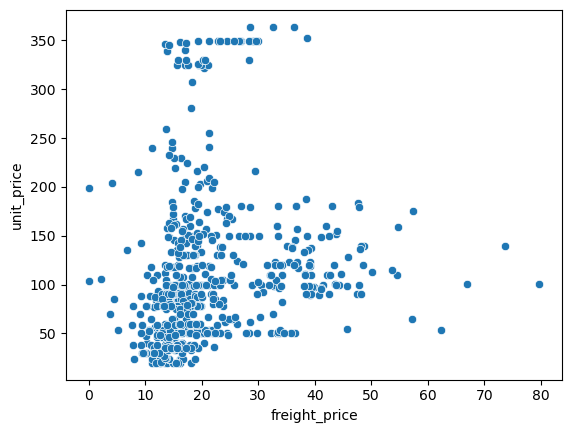

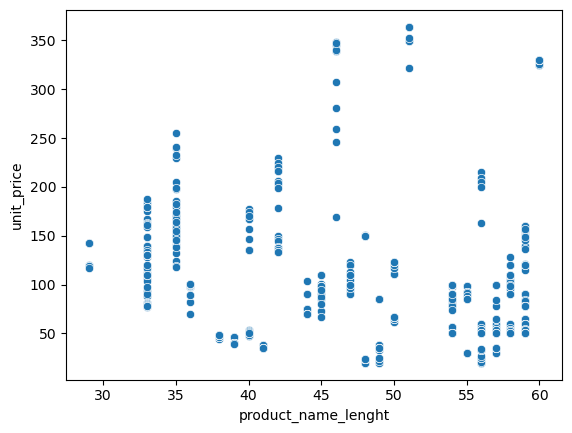

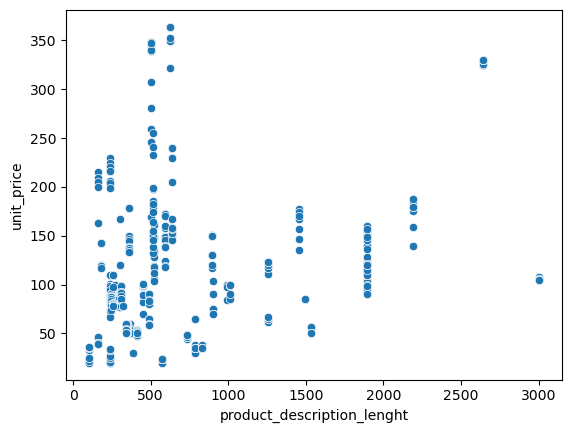

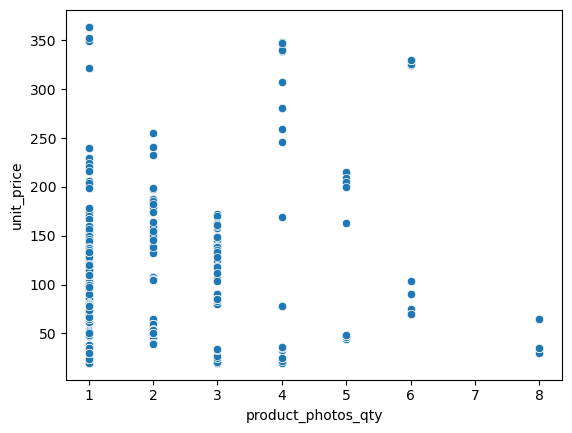

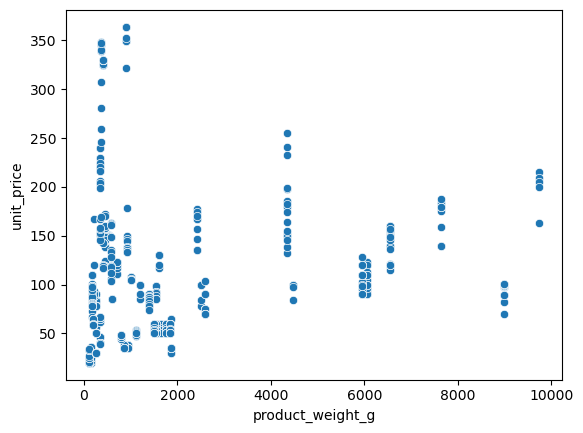

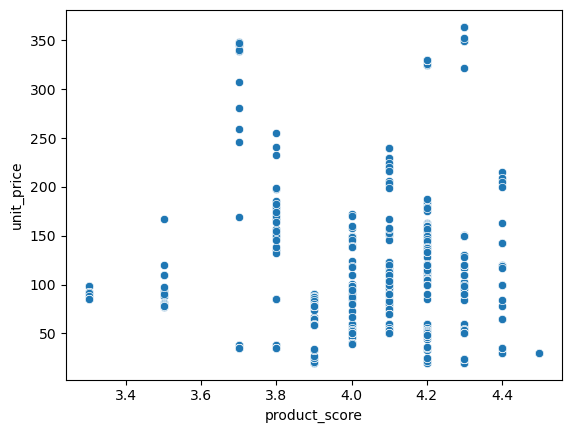

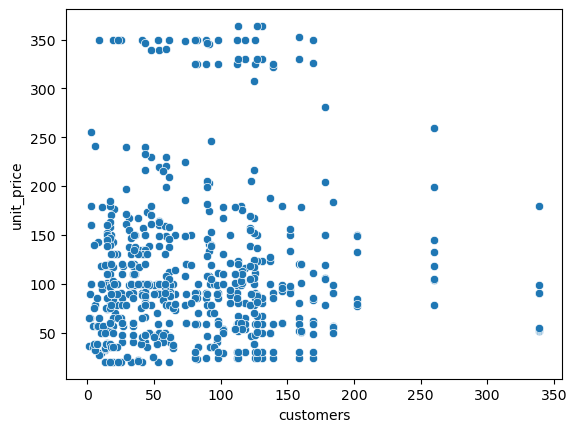

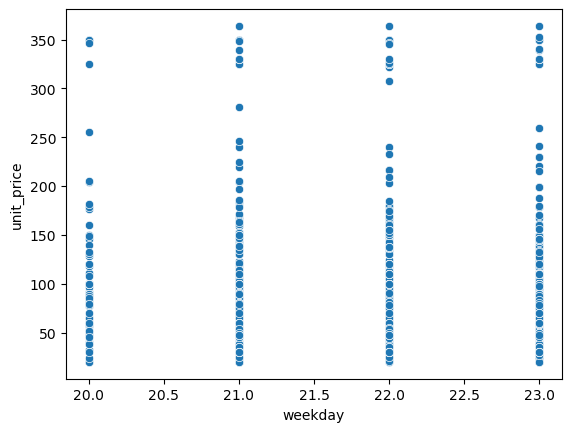

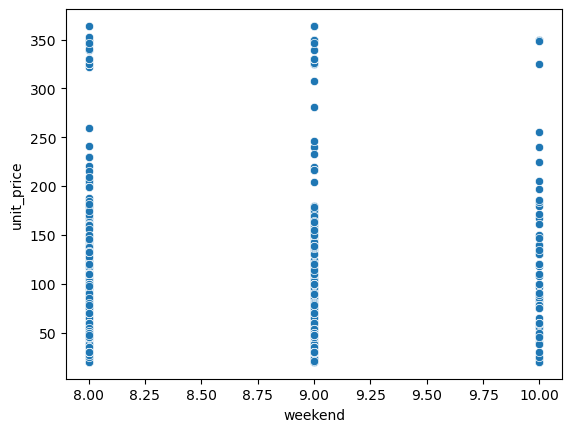

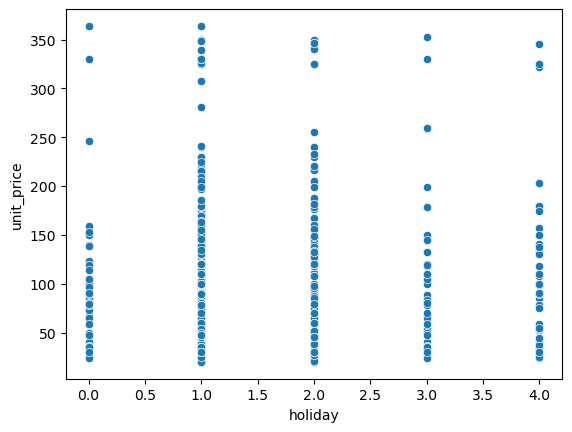

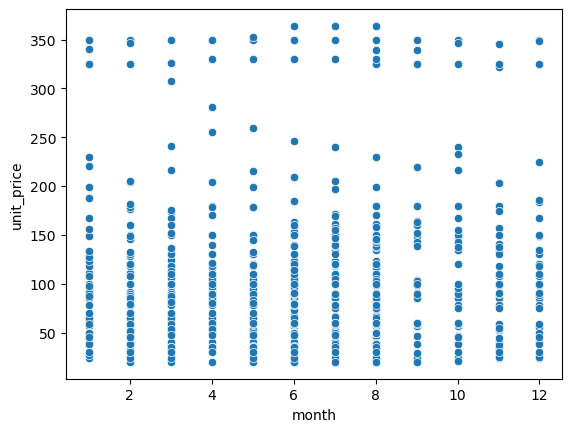

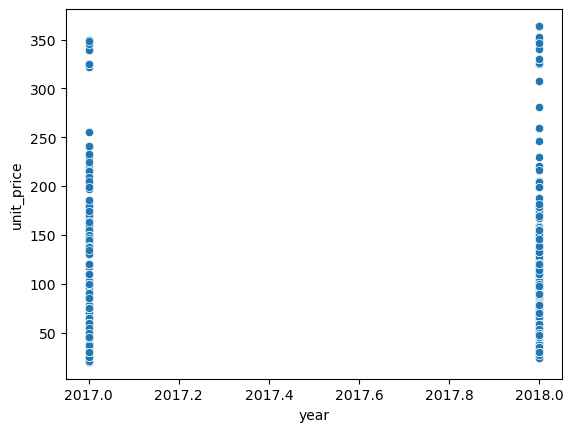

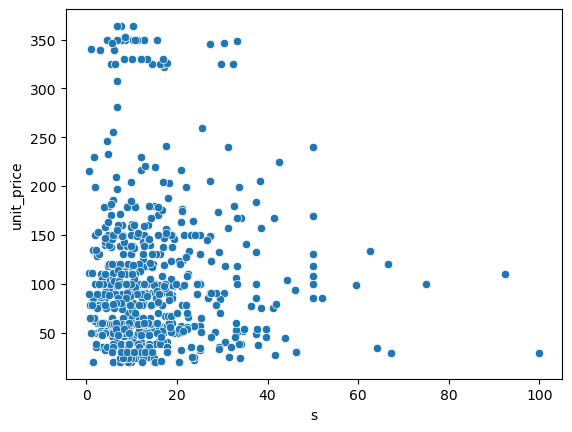

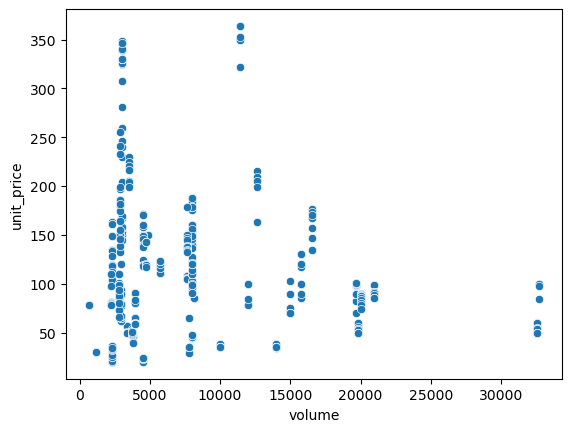

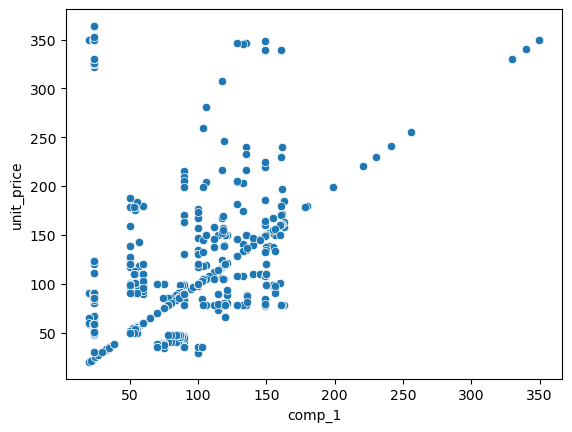

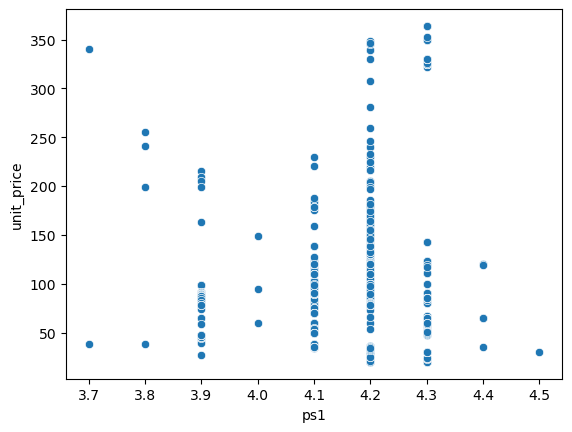

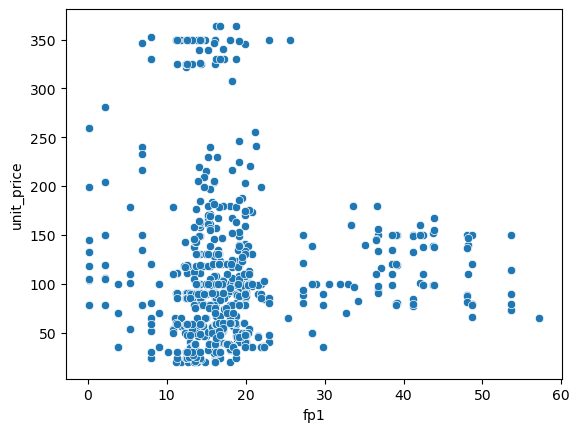

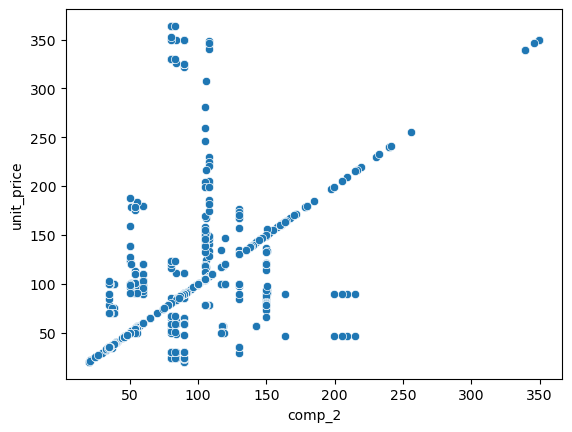

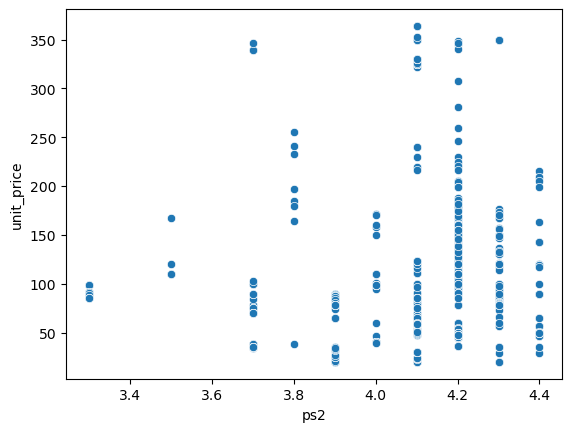

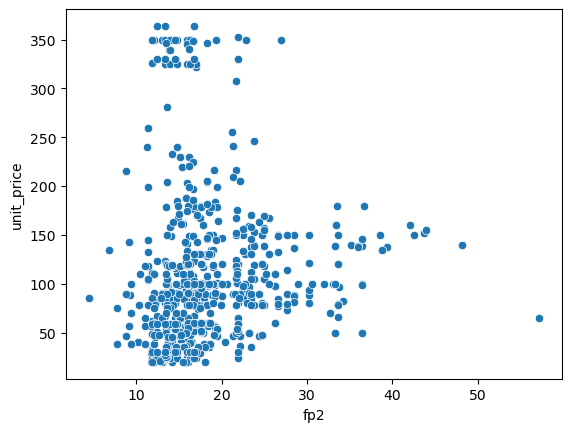

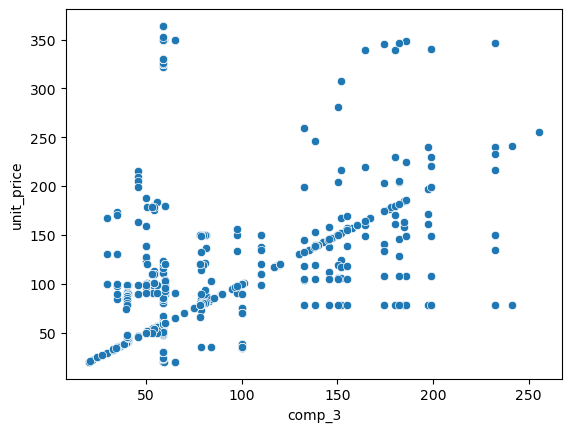

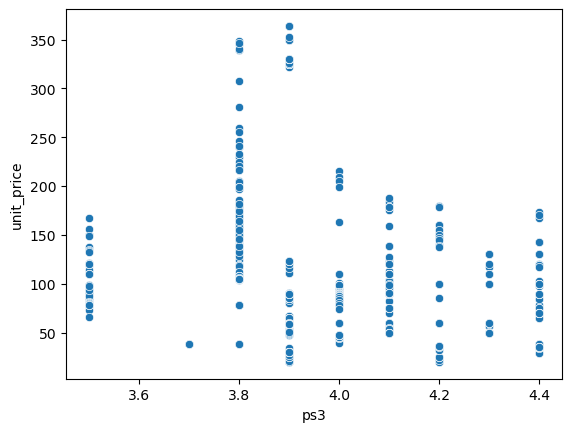

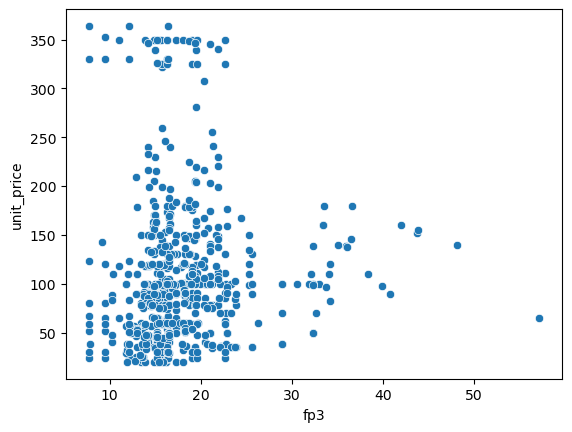

In [15]:
#Scatterplot
for i in ['qty', 'total_price', 'freight_price','product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_score', 'customers',
       'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume',
       'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3',
       ]:  
    sns.scatterplot(data=df, x=i, y='unit_price')  # Removed 'lag_price' - use only one y variable at a time
    plt.show()
                    

In [16]:
s = df.select_dtypes(include="number").corr()

<Axes: >

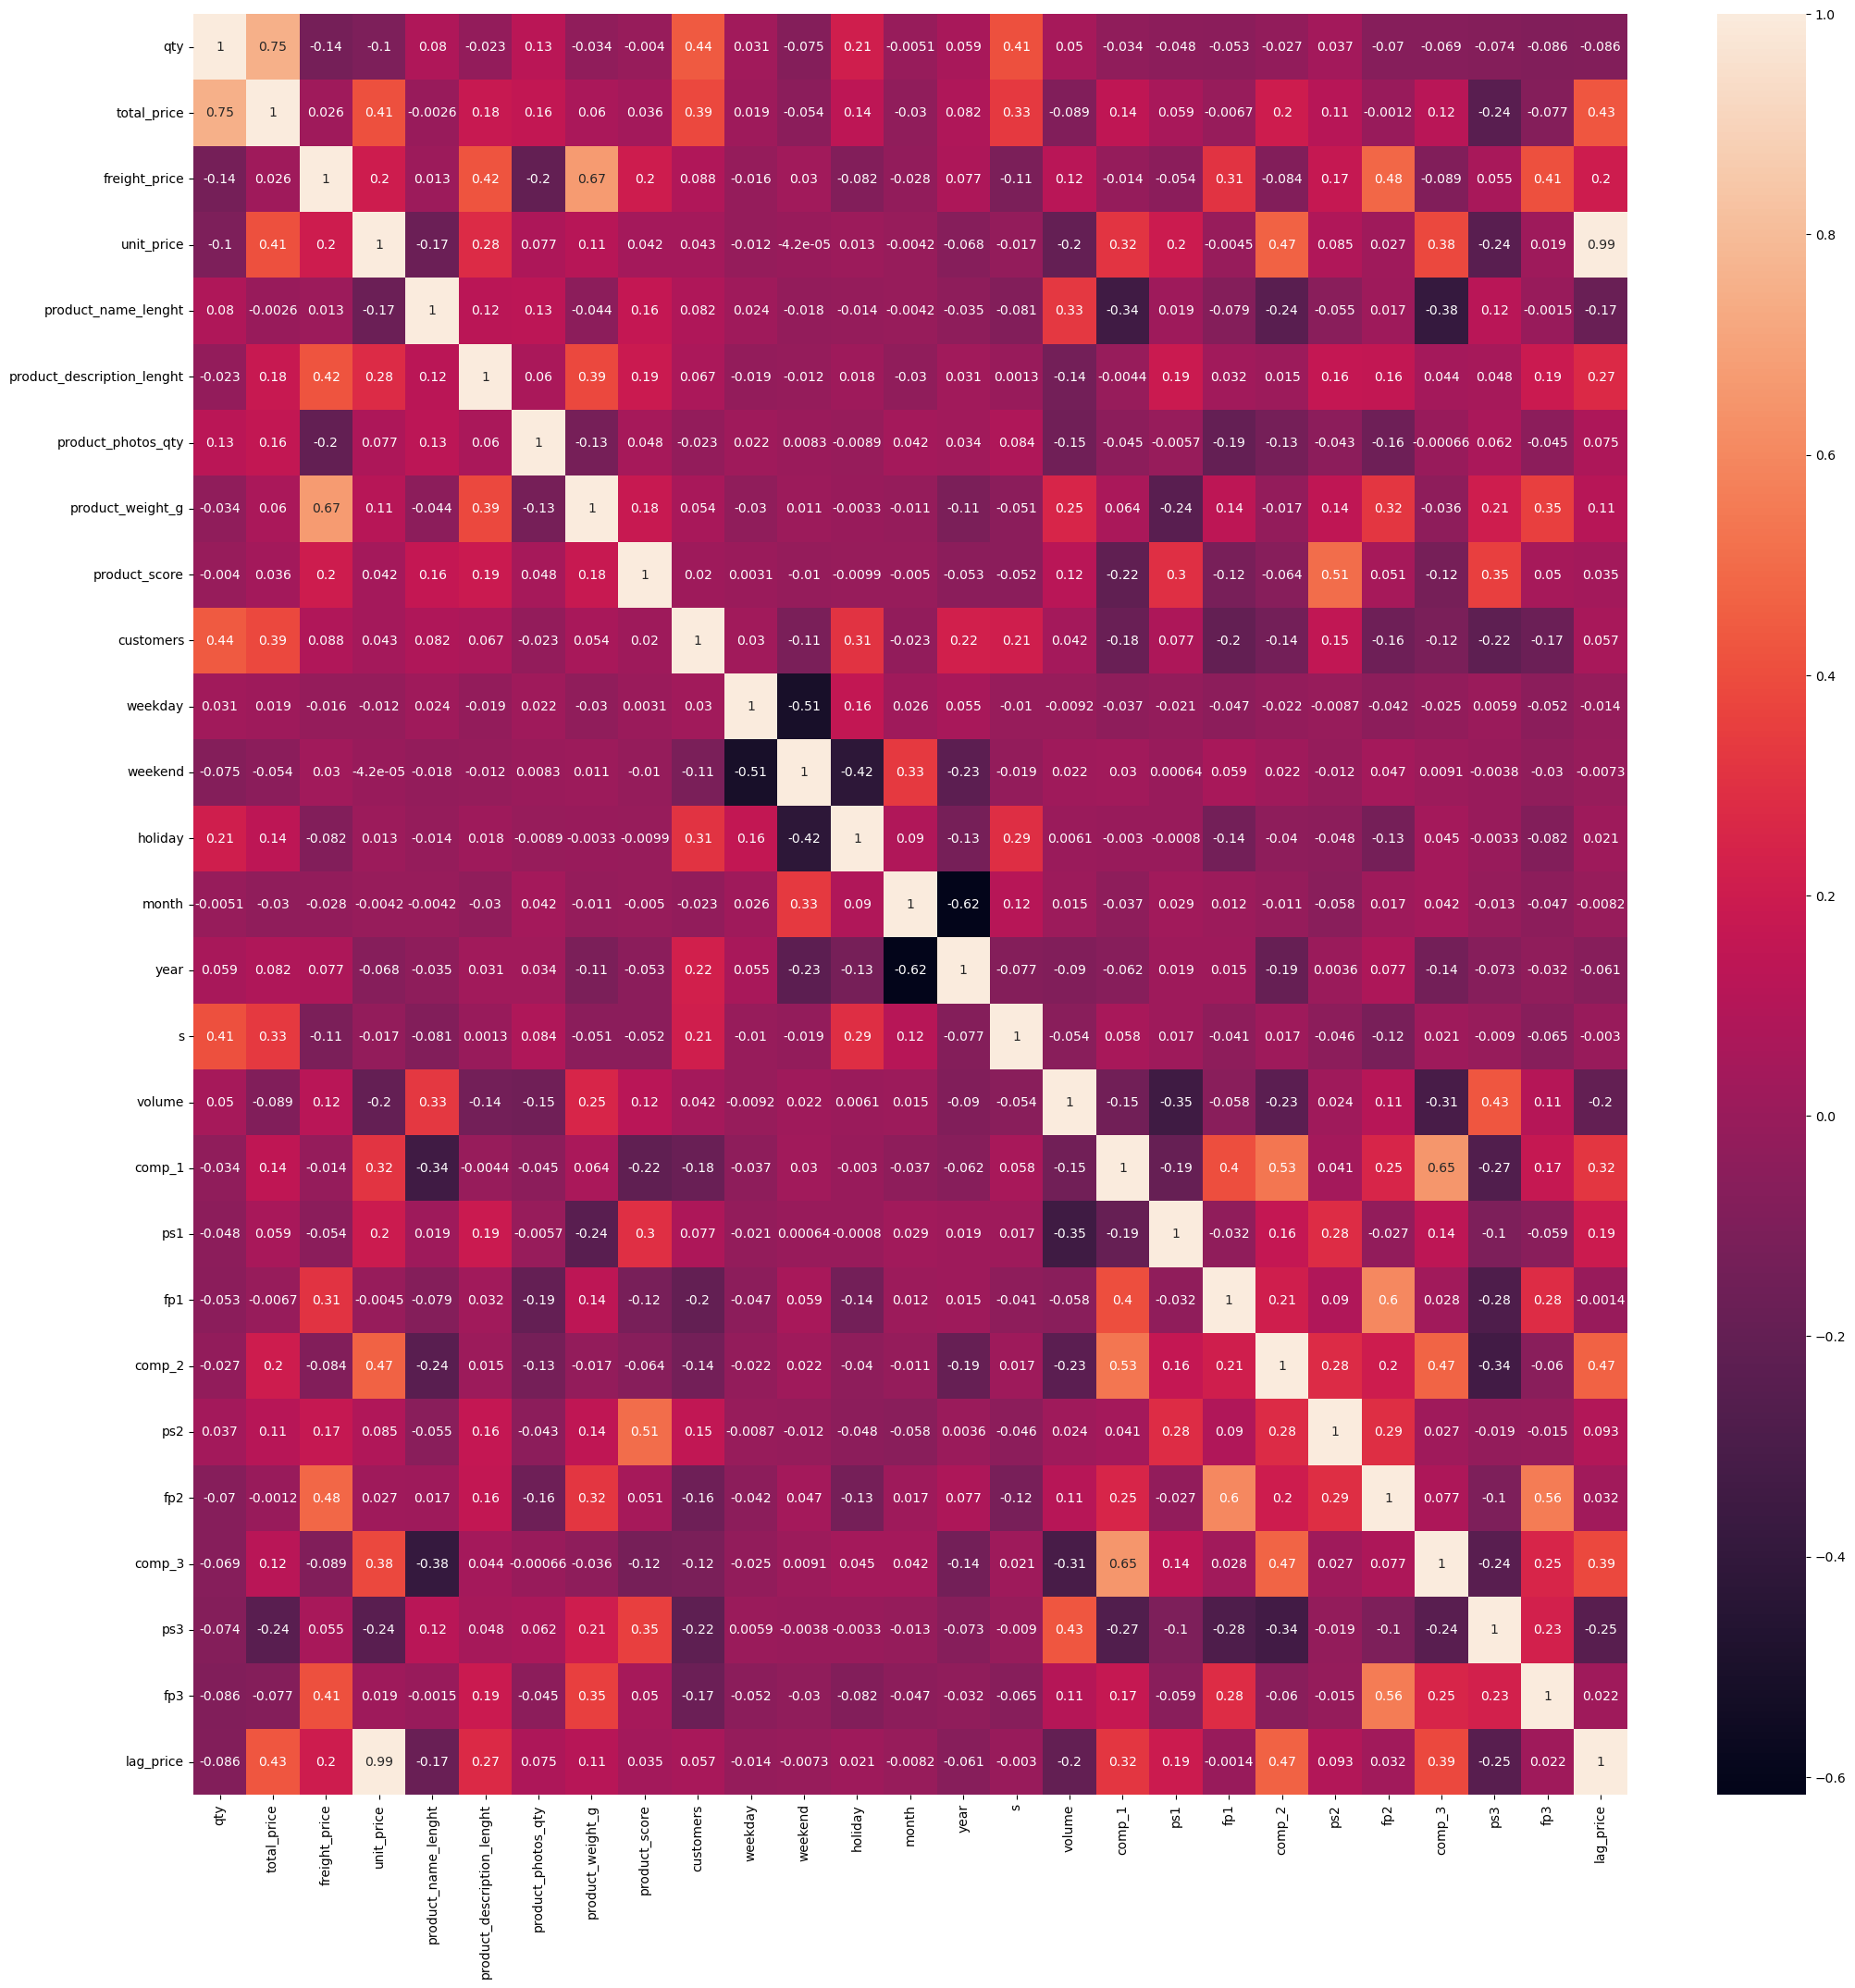

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(s, annot=True)

#### 5.MISSING VALUES TREATMENT

###### choose the method of imputing missing values
       
###### LIKE : MEAN, MEDIAN, MODE OR KNNImputer()

###### The SELECTED DATASET does not have any missing values. 

###### All columns are complete. Therefore there will be no "MISSING VALUES TREATMENT".

#### 6.OUTLIERS TREATMENTS

In [18]:
continuous_numerical_cols = [
    'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
    'product_description_lenght', 'product_weight_g', 'product_score', 's',
    'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3',
    'ps3', 'fp3', 'lag_price'
]

df_treated = df.copy()

In [19]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

In [20]:
# Apply outlier treatment to each continuous numerical column
for col in continuous_numerical_cols:
    df_treated = cap_outliers_iqr(df_treated, col)

# Optional: Save the treated dataset to a new CSV file
df_treated.to_csv('retail_price_outlier_treated.csv', index=False)

Box plots saved to 'box_plots_after_outlier_treatment.png'


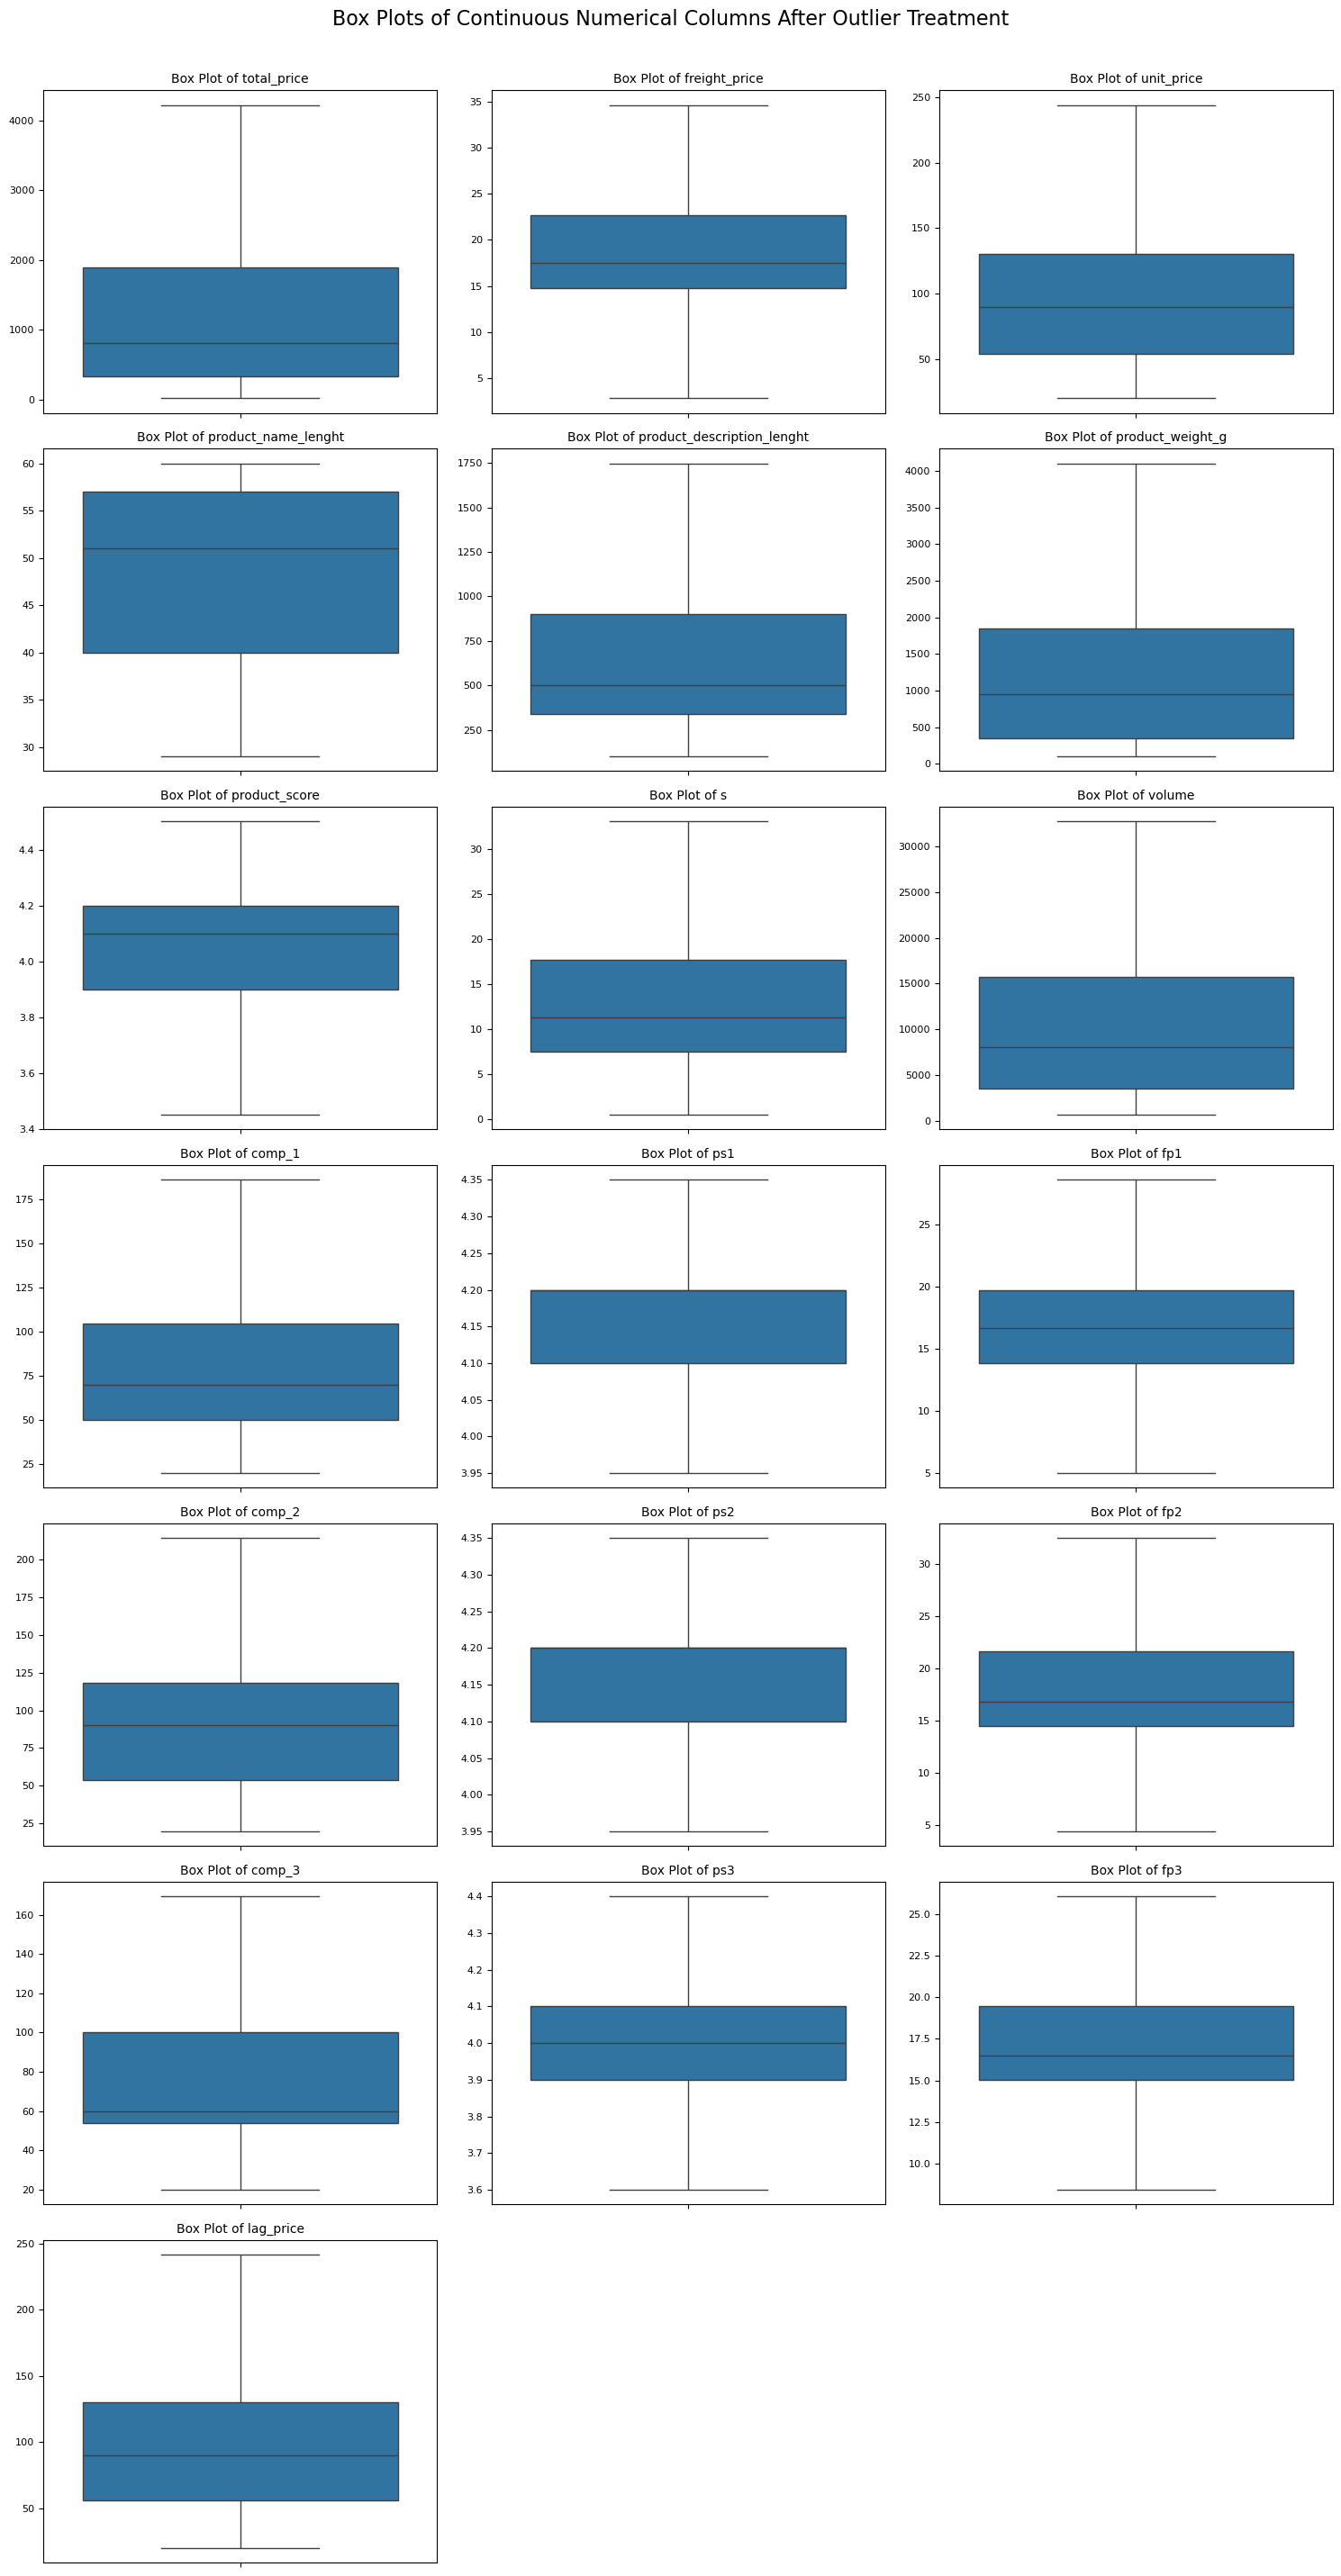

In [21]:
# Set up the matplotlib figure and axes for subplots
import math
num_plots = len(continuous_numerical_cols)
num_cols = 3  # Number of columns for the subplot grid
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create a box plot for each continuous numerical column
for i, col in enumerate(continuous_numerical_cols):
    sns.boxplot(y=df_treated[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=10)
    axes[i].set_ylabel('') # Remove y-label to avoid clutter
    axes[i].tick_params(axis='y', labelsize=8) # Adjust tick label size

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Box Plots of Continuous Numerical Columns After Outlier Treatment', y=1.02, fontsize=16) # Add a main title

# Save the plot
plt.savefig('box_plots_after_outlier_treatment.png')
print("Box plots saved to 'box_plots_after_outlier_treatment.png'")

#### 7.DUPLICATES AND GARBAGE VALUE TREATMENTS

no duplicates are garbage values found!!

#### 8.Define Features (X) and Target (y) for Model Training

In [22]:
X = df_processed.drop(['unit_price', 'month_year', 'total_price'], axis=1)
y = df_processed['unit_price']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


Features (X) shape: (676, 33)
Target (y) shape: (676,)


#### 9.Split the data into training and testing sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split successfully!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data split successfully!
X_train shape: (540, 33)
X_test shape: (136, 33)
y_train shape: (540,)
y_test shape: (136,)


#### 10.Initialize and train the RandomForestRegressor model

In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

print("\nRandomForestRegressor model trained successfully.")


RandomForestRegressor model trained successfully.


#### 11.Model Evaluation

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 3.15
Mean Squared Error (MSE): 45.74
Root Mean Squared Error (RMSE): 6.76
R-squared (R2): 0.99


#### 12.Feature Importance


Top 10 Feature Importances:
               Feature  Importance
24           lag_price    0.988714
21              comp_3    0.001389
18              comp_2    0.001304
15              comp_1    0.000862
0                  qty    0.000777
1        freight_price    0.000680
6        product_score    0.000648
13                   s    0.000644
5     product_weight_g    0.000634
4   product_photos_qty    0.000630


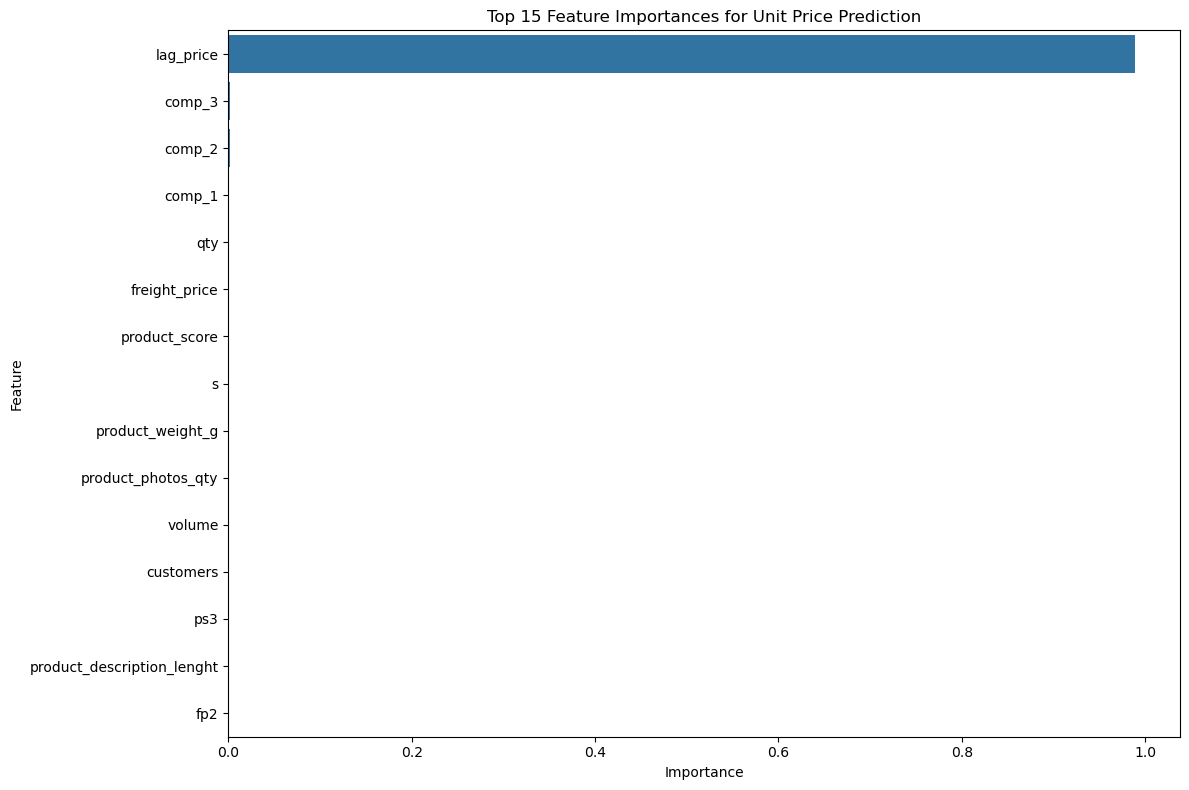

In [26]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances:")
print(importance_df.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances for Unit Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
# plt.savefig('feature_importance.png') # Uncomment to save
plt.show()

#### 13 Save the model using pickle 

In [27]:
model_filename_pickle = 'random_forest_regressor_model.pkl'
with open(model_filename_pickle, 'wb') as file:
    pickle.dump(model, file)

print(f"\nModel saved as {model_filename_pickle} using pickle.")



Model saved as random_forest_regressor_model.pkl using pickle.
